# Book Recommendation System


We collected three groups of datasets:
    
- Meta-data of the books 
- User-book interactions (users' public shelves) 
- Users' detailed book reviews.

These datasets can be merged together by matching book/user/review ids. 

Basic Statistics of the Complete Book Graph:

- 2,360,655 books (1,521,962 works, 400,390 book series, 829,529 authors)
- 876,145 users
- 228,648,342 user-book interactions in users' shelves

Project Steps

- Search for Books
- Create Book List
- Recommend Books  

## Search Engine

### Data Exploration

In [61]:
import gzip 
import json

In [3]:
with gzip.open("data/goodreads_books.json.gz", "r") as f:
    line = f.readline()

In [5]:
line

b'{"isbn": "0312853122", "text_reviews_count": "1", "series": [], "country_code": "US", "language_code": "", "popular_shelves": [{"count": "3", "name": "to-read"}, {"count": "1", "name": "p"}, {"count": "1", "name": "collection"}, {"count": "1", "name": "w-c-fields"}, {"count": "1", "name": "biography"}], "asin": "", "is_ebook": "false", "average_rating": "4.00", "kindle_asin": "", "similar_books": [], "description": "", "format": "Paperback", "link": "https://www.goodreads.com/book/show/5333265-w-c-fields", "authors": [{"author_id": "604031", "role": ""}], "publisher": "St. Martin\'s Press", "num_pages": "256", "publication_day": "1", "isbn13": "9780312853129", "publication_month": "9", "edition_information": "", "publication_year": "1984", "url": "https://www.goodreads.com/book/show/5333265-w-c-fields", "image_url": "https://images.gr-assets.com/books/1310220028m/5333265.jpg", "book_id": "5333265", "ratings_count": "3", "work_id": "5400751", "title": "W.C. Fields: A Life on Film", "t

In [6]:
json.loads(line)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [62]:
import utils, text_normalizer
import pandas as pd

In [4]:
books_titles = []
with gzip.open("data/goodreads_books.json.gz") as f:
    while True:
        line = f.readline()
        if not line:
            break
        fields = utils.parse_fields(line)
        try:
            ratings = int(fields["ratings"])
        except ValueError:
            continue
        if ratings > 5:
            books_titles.append(fields)

In [13]:
titles = pd.DataFrame.from_dict(books_titles)
titles.head()

,book_id,title,ratings,url,cover_image
0,1333909,Good Harbor,10,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...
1,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...
2,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...
3,287140,Runic Astrology: Starcraft and Timekeeping in ...,15,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...
4,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...


In [8]:
print("The shape of the dataset is:",titles.shape, "\n")

The shape of the dataset is: (1782579, 5) 



In [9]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782579 entries, 0 to 1782578
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   book_id      object
 1   title        object
 2   ratings      object
 3   url          object
 4   cover_image  object
dtypes: object(5)
memory usage: 68.0+ MB


In [10]:
titles.isnull().sum()

book_id        0
title          0
ratings        0
url            0
cover_image    0
dtype: int64

Data Tranformation

In [14]:
titles["ratings"] = pd.to_numeric(titles["ratings"])
titles["mod_title"] = titles["title"]
#titles = titles[titles["mod_title"].str.len() > 0]
titles.head()

,book_id,title,ratings,url,cover_image,mod_title
0,1333909,Good Harbor,10,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,Good Harbor
1,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
2,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,Best Friends Forever
3,287140,Runic Astrology: Starcraft and Timekeeping in ...,15,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,Runic Astrology: Starcraft and Timekeeping in ...
4,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,The Aeneid for Boys and Girls


In [17]:
for index,column in titles.iterrows():
  titles.loc[index,"mod_title"] = text_normalizer.clean_text(
    text=titles.loc[index,"mod_title"],
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True,
    custom_pattern=None,
  )
  titles.loc[index,"mod_title"] = text_normalizer.lemmatize_text(titles.loc[index,"mod_title"])

In [18]:
titles.head()

,book_id,title,ratings,url,cover_image,mod_title
0,1333909,Good Harbor,10,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,good harbor
1,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,unschooled wizard sun wolf starhawk
2,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,good friend forever
3,287140,Runic Astrology: Starcraft and Timekeeping in ...,15,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,runic astrology starcraft timekeepe northern t...
4,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,aeneid boy girl


In [19]:
titles.to_csv("clean_data_titles.csv")

Vectorization

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from IPython.core.display import HTML

In [64]:
titles = pd.read_csv("data/clean_data_titles.csv", index_col=0)
titles = titles.dropna()

In [65]:
titles.head()

,book_id,title,ratings,url,cover_image,mod_title
0,1333909,Good Harbor,10,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,good harbor
1,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",140,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,unschooled wizard sun wolf starhawk
2,6066819,Best Friends Forever,51184,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,good friend forever
3,287140,Runic Astrology: Starcraft and Timekeeping in ...,15,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,runic astrology starcraft timekeepe northern t...
4,287141,The Aeneid for Boys and Girls,46,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,aeneid boy girl


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(titles["mod_title"])

In [67]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [68]:
def search(query,vectorizer):
    processed = text_normalizer.clean_query(query)
    query_vec = vectorizer.transform([processed])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -10)[-10:]
    results = titles.iloc[indices]
    results = results.sort_values("ratings", ascending=False)
    
    return HTML(results.head(5).to_html(render_links=True, escape=False, formatters=dict(cover_image=path_to_image_html)))

In [69]:
search("Messi", vectorizer)

,book_id,title,ratings,url,cover_image,mod_title
1426616,6963006,Messi: The Inside Story of the Boy Who Became a Legend,698,https://www.goodreads.com/book/show/6963006-messi,,messi inside story boy legend
413619,19203432,Messi,381,https://www.goodreads.com/book/show/19203432-messi,,messi
1518696,15796988,Messi: A Biography,240,https://www.goodreads.com/book/show/15796988-messi,,messi biography
874388,12535336,Messi: Una biografía,107,https://www.goodreads.com/book/show/12535336-messi,,messi una biografia
1226453,23129750,Messi: More Than a Superstar,62,https://www.goodreads.com/book/show/23129750-messi,,messi superstar


## Recommendations

I am going to create a list of 5 books I would like, in order to get them as referneces for the Recommendation Engine:

- Harry Potter
- Lord of the Rings
- Ghandi Biography
- Pele Biography
- Messi Biography

In [70]:
liked_books = ["28765183","11047557","5800189", "1128203", "6963006"]

In [13]:
!head data/book_id_map.csv

book_id_csv,book_id
0,34684622
1,34536488
2,34017076
3,71730
4,30422361
5,33503613
6,33517540
7,34467031
8,6383669


The "book_id_csv" represents the id of the book on the csv file, wether "book_id" is the individual id of the book on the E-commerce page.

In [71]:
csv_book_mapping = {}

with open("data/book_id_map.csv", "r") as f:
    while True:
        line = f.readline()
        if not line:
            break
        csv_id, book_id = line.strip().split(",")
        csv_book_mapping[csv_id] = book_id

In [9]:
csv_book_mapping['0']

'34684622'

In [14]:
!head data/goodreads_interactions.csv

user_id,book_id,is_read,rating,is_reviewed
0,948,1,5,0
0,947,1,5,1
0,946,1,5,0
0,945,1,5,0
0,944,1,5,0
0,943,1,5,0
0,942,1,5,0
0,941,1,5,0
0,940,1,5,0


We are only interested in three columns of this file:
- The user_id
- The book_id
- The Rating of the book

In [72]:
#This Set will contain every User that have read the same book as us and rate it 4 stars or more
overlap_users = set()

with open("data/goodreads_interactions.csv", 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        user_id, csv_id, _, rating, _ = line.split(",")
        
        if user_id in overlap_users:
            continue

        try:
            rating = int(rating)
        except ValueError:
            continue
        
        #Here we Map the Book Id on the CSV with the Id of the Book itself, 
        #thanks for the csv_book_mapping Dict we built before
        book_id = csv_book_mapping[csv_id]
        
        #Logic to add Users_id to the Set (with its correspondinf filters)
        if book_id in liked_books and rating >= 4:
                overlap_users.add(user_id)

Now we have to find which books those particular users liked

In [73]:
rec_lines = []

with open("data/goodreads_interactions.csv", 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        user_id, csv_id, _, rating, _ = line.split(",")
        
        #Users (and their information) which like the same Books as the 5 ones I put on my "liked list"
        if user_id in overlap_users:
            book_id = csv_book_mapping[csv_id]
            rec_lines.append([user_id, book_id, rating])

In [74]:
recs = pd.DataFrame(rec_lines, columns=["user_id", "book_id", "rating"])
recs["book_id"] = recs["book_id"].astype(str)

In [75]:
recs.head()

,user_id,book_id,rating
0,3359,228665,5
1,3359,233649,5
2,3359,34897,5
3,3359,9539,5
4,3359,35231,5


In [25]:
recs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98293 entries, 0 to 98292
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  98293 non-null  object
 1   book_id  98293 non-null  object
 2   rating   98293 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [27]:
recs.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [26]:
recs.describe()

,user_id,book_id,rating
count,98293,98293,98293
unique,266,62640,6
top,350007,3,0
freq,8126,105,41109


In [34]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/carolinapeinado/Desktop/Santi/BookRecommenderSystem/utils.py'>

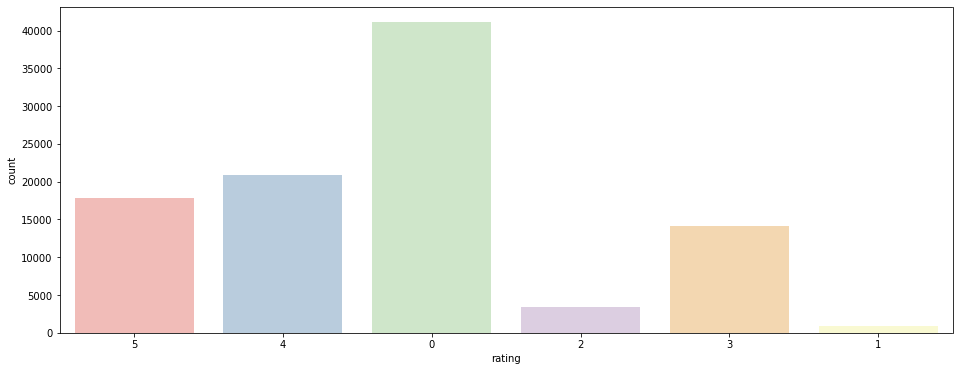

In [33]:
utils.value_counts(recs, "rating")

## Creating Initial Book Recommendations

Let´s see which are the Top 10 most recommended books

In [76]:
top_recs = recs["book_id"].value_counts().head(10)
top_recs

3           105
11047557    102
2767052      97
2657         94
5907         90
28765183     88
34           87
5470         86
13496        83
7613         76
Name: book_id, dtype: int64

In [78]:
#This is to obtain just the indexes of the Top 10
top_recs = top_recs.index.values
print(top_recs)

['3' '11047557' '2767052' '2657' '5907' '28765183' '34' '5470' '13496'
 '7613']


In [79]:
clean_data_titles = pd.read_csv("data/clean_data_titles.csv", index_col=0)
clean_data_titles["book_id"] = clean_data_titles["book_id"].astype(str)

In [80]:
clean_data_titles[clean_data_titles["book_id"].isin(top_recs)]

,book_id,title,ratings,url,cover_image,mod_title
204655,11047557,The Lord of the Rings,2062,https://www.goodreads.com/book/show/11047557-t...,https://images.gr-assets.com/books/1353264320m...,lord ring
386663,2767052,"The Hunger Games (The Hunger Games, #1)",4899965,https://www.goodreads.com/book/show/2767052-th...,https://images.gr-assets.com/books/1447303603m...,hunger game the hunger game
608482,5907,The Hobbit,2099680,https://www.goodreads.com/book/show/5907.The_H...,https://images.gr-assets.com/books/1372847500m...,hobbit
838525,5470,1984,2023937,https://www.goodreads.com/book/show/5470.1984,https://images.gr-assets.com/books/1348990566m...,NaN
1048745,7613,Animal Farm,1928931,https://www.goodreads.com/book/show/7613.Anima...,https://images.gr-assets.com/books/1424037542m...,animal farm
1077226,2657,To Kill a Mockingbird,3255518,https://www.goodreads.com/book/show/2657.To_Ki...,https://images.gr-assets.com/books/1361975680m...,kill mockingbird
1196415,3,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,https://www.goodreads.com/book/show/3.Harry_Po...,https://images.gr-assets.com/books/1474154022m...,harry potter sorcerers stone harry potter
1236294,28765183,Harry Potter and the Prisoner of Azkaban,3066,https://www.goodreads.com/book/show/28765183-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter prisoner azkaban
1316662,13496,"A Game of Thrones (A Song of Ice and Fire, #1)",1359501,https://www.goodreads.com/book/show/13496.A_Ga...,https://images.gr-assets.com/books/1436732693m...,game throne a song ice fire
1652017,34,The Fellowship of the Ring (The Lord of the Ri...,1813229,https://www.goodreads.com/book/show/34.The_Fel...,https://images.gr-assets.com/books/1298411339m...,fellowship ring the lord ring


## Conclutions of the Initial Recommendatino Engine

As we can see, the 10 books recommended make sense. We could say that the "Harry Potter" and "Lord of the Rings" ones have got much more influence than the other ones. I believe this is mainly because of the amount of people who like (and rated positively) this books, hence it tweaks the recommendation for this niche. Let´s see how we can improve it a little bit more...

## Improving our Book Recommendations

In [81]:
all_recs = recs["book_id"].value_counts()
all_recs = all_recs.to_frame().reset_index()
all_recs.columns = ["book_id", "book_count"]

In [82]:
all_recs.head(5)

,book_id,book_count
0,3,105
1,11047557,102
2,2767052,97
3,2657,94
4,5907,90


In [83]:
all_recs = all_recs.merge(clean_data_titles, how="inner", on="book_id")

In [84]:
#This is to reduce the importance of the most popular books, otherwise it would not be
#as personal the recommendation engine and it would be influence but the most common books
all_recs["score"] = all_recs["book_count"] * (all_recs["book_count"] / all_recs["ratings"])

In [98]:
all_recs

,book_id,book_count,title,ratings,url,cover_image,mod_title,score
0,3,105,Harry Potter and the Sorcerer's Stone (Harry P...,4765497,https://www.goodreads.com/book/show/3.Harry_Po...,https://images.gr-assets.com/books/1474154022m...,harry potter sorcerers stone harry potter,0.002314
1,11047557,102,The Lord of the Rings,2062,https://www.goodreads.com/book/show/11047557-t...,https://images.gr-assets.com/books/1353264320m...,lord ring,5.045587
2,2767052,97,"The Hunger Games (The Hunger Games, #1)",4899965,https://www.goodreads.com/book/show/2767052-th...,https://images.gr-assets.com/books/1447303603m...,hunger game the hunger game,0.001920
3,2657,94,To Kill a Mockingbird,3255518,https://www.goodreads.com/book/show/2657.To_Ki...,https://images.gr-assets.com/books/1361975680m...,kill mockingbird,0.002714
4,5907,90,The Hobbit,2099680,https://www.goodreads.com/book/show/5907.The_H...,https://images.gr-assets.com/books/1372847500m...,hobbit,0.003858
...,...,...,...,...,...,...,...,...
61663,13571893,1,"Impulse (Mageri, #3)",5711,https://www.goodreads.com/book/show/13571893-i...,https://images.gr-assets.com/books/1374344359m...,impulse mageri,0.000175
61664,23285716,1,"Charming (Seven, #6.5)",400,https://www.goodreads.com/book/show/23285716-c...,https://images.gr-assets.com/books/1443668100m...,charm seven,0.002500
61665,25613484,1,No-One Ever has Sex in the Suburbs,208,https://www.goodreads.com/book/show/25613484-n...,https://images.gr-assets.com/books/1434202302m...,sex suburb,0.004808
61666,16036265,1,Closer,1545,https://www.goodreads.com/book/show/16036265-c...,https://images.gr-assets.com/books/1366592284m...,close,0.000647


In [99]:
all_recs.sort_values("score", ascending=False).head(10)

,book_id,book_count,title,ratings,url,cover_image,mod_title,score
1,11047557,102,The Lord of the Rings,2062,https://www.goodreads.com/book/show/11047557-t...,https://images.gr-assets.com/books/1353264320m...,lord ring,5.045587
5,28765183,88,Harry Potter and the Prisoner of Azkaban,3066,https://www.goodreads.com/book/show/28765183-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter prisoner azkaban,2.525766
66,6963006,38,Messi: The Inside Story of the Boy Who Became ...,698,https://www.goodreads.com/book/show/6963006-messi,https://images.gr-assets.com/books/1328692845m...,messi inside story boy legend,2.068768
104,1128203,31,Pelé: The Autobiography,885,https://www.goodreads.com/book/show/1128203.Pel_,https://s.gr-assets.com/assets/nophoto/book/11...,pele autobiography,1.085876
26,28699254,60,Harry Potter and the Chamber of Secrets,3528,https://www.goodreads.com/book/show/28699254-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter chamber secret,1.020408
36,28754622,54,Harry Potter and the Goblet of Fire,3314,https://www.goodreads.com/book/show/28754622-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter goblet fire,0.879903
62,28780969,40,Harry Potter and the Order of the Phoenix (Har...,3009,https://www.goodreads.com/book/show/28780969-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter order phoenix harry potter,0.531738
43,28757261,50,Harry Potter and the Philosopher's Stone,5212,https://www.goodreads.com/book/show/28757261-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter philosopher stone,0.479662
72,28767931,36,Harry Potter and the Half-Blood Prince (Harry ...,2784,https://www.goodreads.com/book/show/28767931-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter halfblood prince harry potter,0.465517
11286,35530652,2,"Grey Sister (Book of the Ancestor, #2)",9,https://www.goodreads.com/book/show/35530652-g...,https://images.gr-assets.com/books/1502196706m...,grey sister book ancestor,0.444444


In [112]:
all_recs[all_recs["book_count"] > 50].sort_values("score", ascending=False).head(10)

,book_id,book_count,title,ratings,url,cover_image,mod_title,score
1,11047557,102,The Lord of the Rings,2062,https://www.goodreads.com/book/show/11047557-t...,https://images.gr-assets.com/books/1353264320m...,lord ring,5.045587
5,28765183,88,Harry Potter and the Prisoner of Azkaban,3066,https://www.goodreads.com/book/show/28765183-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter prisoner azkaban,2.525766
26,28699254,60,Harry Potter and the Chamber of Secrets,3528,https://www.goodreads.com/book/show/28699254-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter chamber secret,1.020408
36,28754622,54,Harry Potter and the Goblet of Fire,3314,https://www.goodreads.com/book/show/28754622-h...,https://s.gr-assets.com/assets/nophoto/book/11...,harry potter goblet fire,0.879903
41,29056083,52,Harry Potter and the Cursed Child - Parts One ...,288018,https://www.goodreads.com/book/show/29056083-h...,https://images.gr-assets.com/books/1470082995m...,harry potter curse child part harry potter,0.009388
39,15241,53,"The Two Towers (The Lord of the Rings, #2)",490005,https://www.goodreads.com/book/show/15241.The_...,https://images.gr-assets.com/books/1298415523m...,tower the lord ring,0.005733
42,18512,51,"The Return of the King (The Lord of the Rings,...",473101,https://www.goodreads.com/book/show/18512.The_...,https://images.gr-assets.com/books/1389977161m...,return king the lord ring,0.005498
8,13496,83,"A Game of Thrones (A Song of Ice and Fire, #1)",1359501,https://www.goodreads.com/book/show/13496.A_Ga...,https://images.gr-assets.com/books/1436732693m...,game throne a song ice fire,0.005067
6,34,87,The Fellowship of the Ring (The Lord of the Ri...,1813229,https://www.goodreads.com/book/show/34.The_Fel...,https://images.gr-assets.com/books/1298411339m...,fellowship ring the lord ring,0.004174
13,865,74,The Alchemist,1342863,https://www.goodreads.com/book/show/865.The_Al...,https://images.gr-assets.com/books/1483412266m...,alchemist,0.004078


In [113]:
popular_recs = all_recs[all_recs["book_count"] > 50].sort_values("score", ascending=False)

In [114]:
HTML(popular_recs[~popular_recs["book_id"].isin(liked_books)].head(10).to_html(render_links=True, escape=False, formatters=dict(cover_image=path_to_image_html)))

,book_id,book_count,title,ratings,url,cover_image,mod_title,score
26,28699254,60,Harry Potter and the Chamber of Secrets,3528,https://www.goodreads.com/book/show/28699254-harry-potter-and-the-chamber-of-secrets,,harry potter chamber secret,1.020408
36,28754622,54,Harry Potter and the Goblet of Fire,3314,https://www.goodreads.com/book/show/28754622-harry-potter-and-the-goblet-of-fire,,harry potter goblet fire,0.879903
41,29056083,52,"Harry Potter and the Cursed Child - Parts One and Two (Harry Potter, #8)",288018,https://www.goodreads.com/book/show/29056083-harry-potter-and-the-cursed-child---parts-one-and-two,,harry potter curse child part harry potter,0.009388
39,15241,53,"The Two Towers (The Lord of the Rings, #2)",490005,https://www.goodreads.com/book/show/15241.The_Two_Towers,,tower the lord ring,0.005733
42,18512,51,"The Return of the King (The Lord of the Rings, #3)",473101,https://www.goodreads.com/book/show/18512.The_Return_of_the_King,,return king the lord ring,0.005498
8,13496,83,"A Game of Thrones (A Song of Ice and Fire, #1)",1359501,https://www.goodreads.com/book/show/13496.A_Game_of_Thrones,,game throne a song ice fire,0.005067
6,34,87,"The Fellowship of the Ring (The Lord of the Rings, #1)",1813229,https://www.goodreads.com/book/show/34.The_Fellowship_of_the_Ring,,fellowship ring the lord ring,0.004174
13,865,74,The Alchemist,1342863,https://www.goodreads.com/book/show/865.The_Alchemist,,alchemist,0.004078
4,5907,90,The Hobbit,2099680,https://www.goodreads.com/book/show/5907.The_Hobbit,,hobbit,0.003858
7,5470,86,1984,2023937,https://www.goodreads.com/book/show/5470.1984,,NaN,0.003654
